In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential

train_df = pd.read_csv(r'C:\Users\mkahs\Desktop\fashionmnist\fashion-mnist_train.csv')
test_df = pd.read_csv(r'C:\Users\mkahs\Desktop\fashionmnist\fashion-mnist_test.csv')
test_df.head()




Using TensorFlow backend.


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype = 'float32')

x_train = train_data [:, 1:]/255
y_train = train_data [:,0]


x_test = test_data[:, 1:]/255
y_test = test_data [:,0]


In [18]:
x_train, x_validate, y_train, y_validate = train_test_split(
x_train, y_train, test_size= 0.2, random_state = 12345,
)

<function matplotlib.pyplot.show(*args, **kw)>

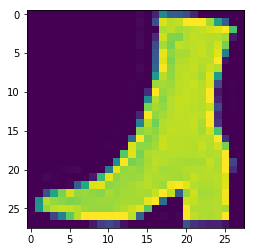

In [19]:
image = x_train[30, :].reshape((28,28))
plt.imshow(image)
plt.show

In [20]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [21]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [22]:

tensorboard = TensorBoard(
    log_dir=r'logs\{}'.format('cnn_1layer'),
    write_graph=True,
    write_grads=True,
    histogram_freq=1,
    write_images=True,
)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [23]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
    callbacks=[tensorboard]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 22s 455us/step - loss: 0.7768 - acc: 0.7414 - val_loss: 0.4831 - val_acc: 0.8305
Epoch 2/10
48000/48000 [==============================] - 19s 402us/step - loss: 0.4411 - acc: 0.8467 - val_loss: 0.4017 - val_acc: 0.8613
Epoch 3/10
48000/48000 [==============================] - 19s 401us/step - loss: 0.3834 - acc: 0.8663 - val_loss: 0.3582 - val_acc: 0.8775
Epoch 4/10
48000/48000 [==============================] - 19s 395us/step - loss: 0.3548 - acc: 0.8763 - val_loss: 0.3483 - val_acc: 0.8775
Epoch 5/10
48000/48000 [==============================] - 19s 405us/step - loss: 0.3376 - acc: 0.8820 - val_loss: 0.3286 - val_acc: 0.8867
Epoch 6/10
48000/48000 [==============================] - 19s 402us/step - loss: 0.3179 - acc: 0.8887 - val_loss: 0.3067 - val_acc: 0.8917
Epoch 7/10
48000/48000 [==============================] - 19s 397us/step - loss: 0.3089 - acc: 0.8913 - val_loss: 0.

In [24]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

test loss: 0.2820
 test acc: 0.9011
